In [1]:
import pandas 
import networkx as nx
import time
from itertools import islice

In [2]:
file_path_smallCollege = './data/smallCollege.pickle' # { 'key': ['names'] }
file_path_smallEmployer = './data/smallEmployer.pickle' # { 'key': ['names'] }
file_path_smallLinkedIn = './data/smallLinkedin.gexf'
file_path_smallLocation = './data/smallLocation.pickle'

In [3]:
file_smallCollege = pandas.read_pickle(file_path_smallCollege)
file_smallEmployer = pandas.read_pickle(file_path_smallEmployer)
file_smallLocation = pandas.read_pickle(file_path_smallLocation)
file_gexf = nx.read_gexf(file_path_smallLinkedIn)

In [4]:
def take(n, dict_obj):
    new_dict = {}
    count = 1
    for key,val in dict_obj.items():
        new_dict[key] = val
        count += 1
        if (count > n) : break
    return new_dict

In [5]:
print(take(10, file_smallLocation))
print('\n')
print(take(10, file_smallEmployer))
print('\n')
print(take(10, file_smallCollege))

{'U15609': ['urbana-champaign illinois area'], 'U11824': ['urbana-champaign illinois area'], 'U8046': ['urbana-champaign illinois area'], 'U15689': ['bloomington normal illinois area'], 'U15715': ['springfield illinois area'], 'U15885': ['urbana-champaign illinois area'], 'U2124': ['urbana-champaign illinois area'], 'U2177': ['greater chicago area'], 'U15528': ['urbana-champaign illinois area'], 'U2919': ['united states']}


{'U21881': ['lsst', 'ncsa', 'national center for supercomputing applications', 'grace community church champaign il'], 'U8046': ['wolfram research', 'small fry web works'], 'U15683': ['salt and light'], 'U14561': ['busey bank'], 'U15499': ['breeze sun technologies', 'national mortgage lender'], 'U2124': ['sigma aldrich', 'mueller company ltd', 'ymca of rockies'], 'U2155': ['pgav planners'], 'U2177': ['life on vine', 'great commission ministries', 'north park theological seminary', 'personalcare hmo', 'caterpillar inc.'], 'U12490': ['capsher technology inc.'], 'U144

In [6]:
def list_of_different_attribute_values(d):
    return set([v for values in d.values() for v in values])

In [7]:
#print(list_of_different_attribute_values(file_smallEmployer))
file = pandas.read_pickle('./data/mediumEmployer.pickle')
for val in list_of_different_attribute_values(file): 
    #if val == 'google' : 
    #    print(True)
    #    print(val)
    #    print(val.find('google'))
    if val.find('google') >= 0 :print(val)
    #else : print(val)

google inc
google


In [8]:
print("Nb of users with one or more attribute college: %d" % len(file_path_smallCollege))
print("Nb of users with one or more attribute location: %d" % len(file_path_smallLocation))
print("Nb of users with one or more attribute employer: %d" % len(file_path_smallEmployer))

Nb of users with one or more attribute college: 26
Nb of users with one or more attribute location: 27
Nb of users with one or more attribute employer: 27


In [9]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np

In [10]:
def properties(g):
    """
    Computes simple and classic graph metrics.

    Parameters
    ----------
    g : graph
       A networkx graph
    """
    # networkx short summary of information for the graph g
    print(nx.info(g))
    
    # Draw the degree distribution. Powerlow distribution for a real (complex) network
    plt.figure(num=None)
    fig = plt.figure(1)
    degree_sequence=[d for n, d in g.degree()] # degree sequence
    print("Degree sequence %s" % degree_sequence)
    plt.hist(degree_sequence, bins='auto')  
    plt.title("powerlaw degree distribution")
    plt.ylabel("# nodes")
    plt.xlabel("degree")
    plt.show()
    pylab.close()
    del fig
    
    precomputed_eccentricity = nx.eccentricity(g) # costly step, we save time here!
    print("Graph density %f" % nx.density(g))
    print("Diameter (maximum eccentricity): %d" % nx.diameter(g,precomputed_eccentricity))
    print("Radius (minimum eccentricity): %d" % nx.radius(g,precomputed_eccentricity)) #The radius is the minimum eccentricity.
    print("Mean eccentricity (eccentricity(v) = the maximum distance from v to all other nodes): %s" % np.mean(list(precomputed_eccentricity.values())))
    print("Center is composed of %d nodes (nodes with eccentricity equal to radius)" % len(nx.center(g, precomputed_eccentricity)))
    print("Periphery is composed of %d nodes (nodes with eccentricity equal to the diameter)" % len(nx.periphery(g,precomputed_eccentricity)))
    print("Mean clustering coefficient %f" % np.mean(list(nx.clustering(g).values())))
    total_triangles=sum(nx.triangles(g).values())/3    
    print("Total number of triangles in graph: %d" % total_triangles)

Name: 
Type: Graph
Number of nodes: 205
Number of edges: 287
Average degree:   2.8000
Degree sequence [1, 2, 2, 1, 1, 1, 1, 7, 12, 1, 3, 1, 1, 1, 1, 1, 1, 2, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 119, 1, 1, 1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 4, 1, 1, 1, 1, 7, 3, 1, 2, 2, 16, 1, 1, 1, 2, 1, 1, 1, 26, 1, 5, 5, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 3, 1, 1, 5, 1, 1, 2, 10, 4, 1, 1, 4, 2, 1, 1, 1, 1, 6, 1, 1, 4, 1, 1, 2, 1, 1, 5, 1, 2, 1, 2, 1, 6, 6, 1, 1, 3, 1, 10, 1, 1, 20, 1, 5, 1, 1, 1, 1, 4, 3, 1, 4, 2, 8, 4, 1, 3, 2, 1, 1, 7, 1, 1, 1, 1, 1, 1, 5, 1, 1, 3, 1, 7, 1, 1, 2, 1, 1, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


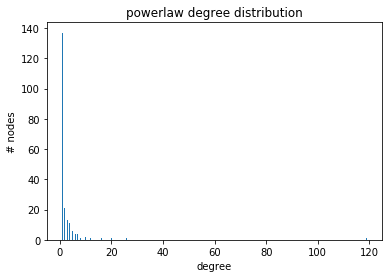

Graph density 0.013725
Diameter (maximum eccentricity): 11
Radius (minimum eccentricity): 6
Mean eccentricity (eccentricity(v) = the maximum distance from v to all other nodes): 8.321951219512195
Center is composed of 4 nodes (nodes with eccentricity equal to radius)
Periphery is composed of 15 nodes (nodes with eccentricity equal to the diameter)
Mean clustering coefficient 0.181355
Total number of triangles in graph: 92


In [11]:
properties(file_gexf)

In [12]:
def draw_graph(g, node_attribute=None, list_of_values_of_attributes=None):
    """
    Draw the graph g.

    Parameters
    ----------
    g : graph
       A networkx graph
    node_attribute : string 
       The name of the node attribute used to assign colors to the drawing
    list_of_values_of_attributes : list
        A list of all the potential values of node_attribute to assign one color
        per value.
    """
    #initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    
    pos = nx.spring_layout(g, iterations=100)

    
    if node_attribute and list_of_values_of_attributes: 
        # To associate colors to nodes according to an attribute, here college
        # build a color_map, one for each college
        color_map={}
        i=0.0
        for s in list_of_values_of_attributes:
            color_map[s]=i
            i+=1/len(list_of_values_of_attributes)
        color_map[None]=1 # for nodes without values for the attribute node_attribute
        
        # The values supplied to node_color should be in the same order as the nodes 
        # listed in G.nodes(). We take an arbitrary mapping of values color_map and 
        # generate the values list in the correct order
        #values = [color_map[G.node[node].get(node_attribute)] for node in G.nodes()] # for attributes encoded in the graph
        values=[]        
        for node in g.nodes():
            if node in node_attribute:
                if node_attribute[node]:
                    # we arbitrarily take the first value 
                    values.append(color_map[node_attribute[node][0]])
            else:
                values.append(1)
               
        nx.draw_networkx_nodes(g, pos, cmap=plt.get_cmap('jet'), node_color=values)
    else:
        nx.draw_networkx_nodes(g, pos)
       
    nx.draw_networkx_edges(g, pos)
    nx.draw_networkx_labels(g, pos)

    cut = 1.15
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(-xmax, xmax)
    plt.ylim(-ymax, ymax)
    #plt.savefig('./graph_charts/' + str(time.time()) + '.jpeg')
    plt.show()
    pylab.close()
    del fig

In [13]:
list_of_vals = list_of_different_attribute_values(file_smallEmployer)
#for key, val in file_smallEmployer :
#    if ('U7982' in list_of) : print(list_of['U7982'])
#    if ('U15683' in list_of) : print()
print(file_smallEmployer['U7982'])   
print(file_smallEmployer['U15683']) 
print(file_smallEmployer['U7983']) 

['re max realty associates']
['salt and light']
['keller williams-inskip realtyteam', 'keller williams realty', 'rector property management']


/home/valeporti/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


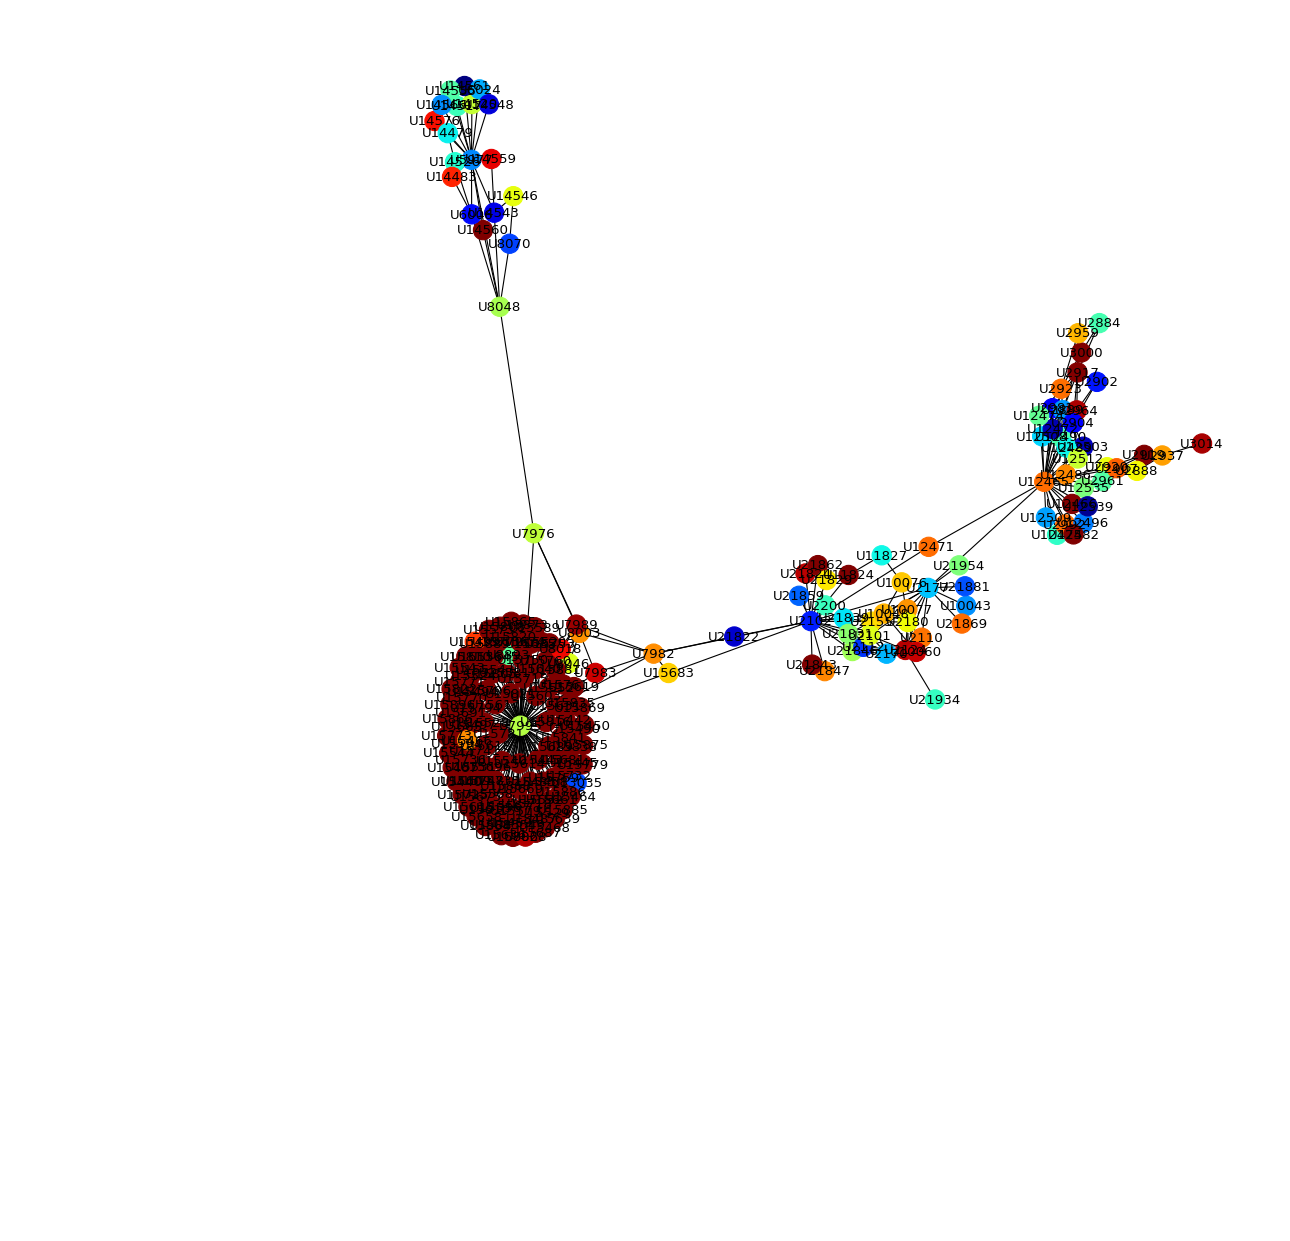

In [14]:
draw_graph(file_gexf, node_attribute=file_smallEmployer, list_of_values_of_attributes=list_of_different_attribute_values(file_smallEmployer))

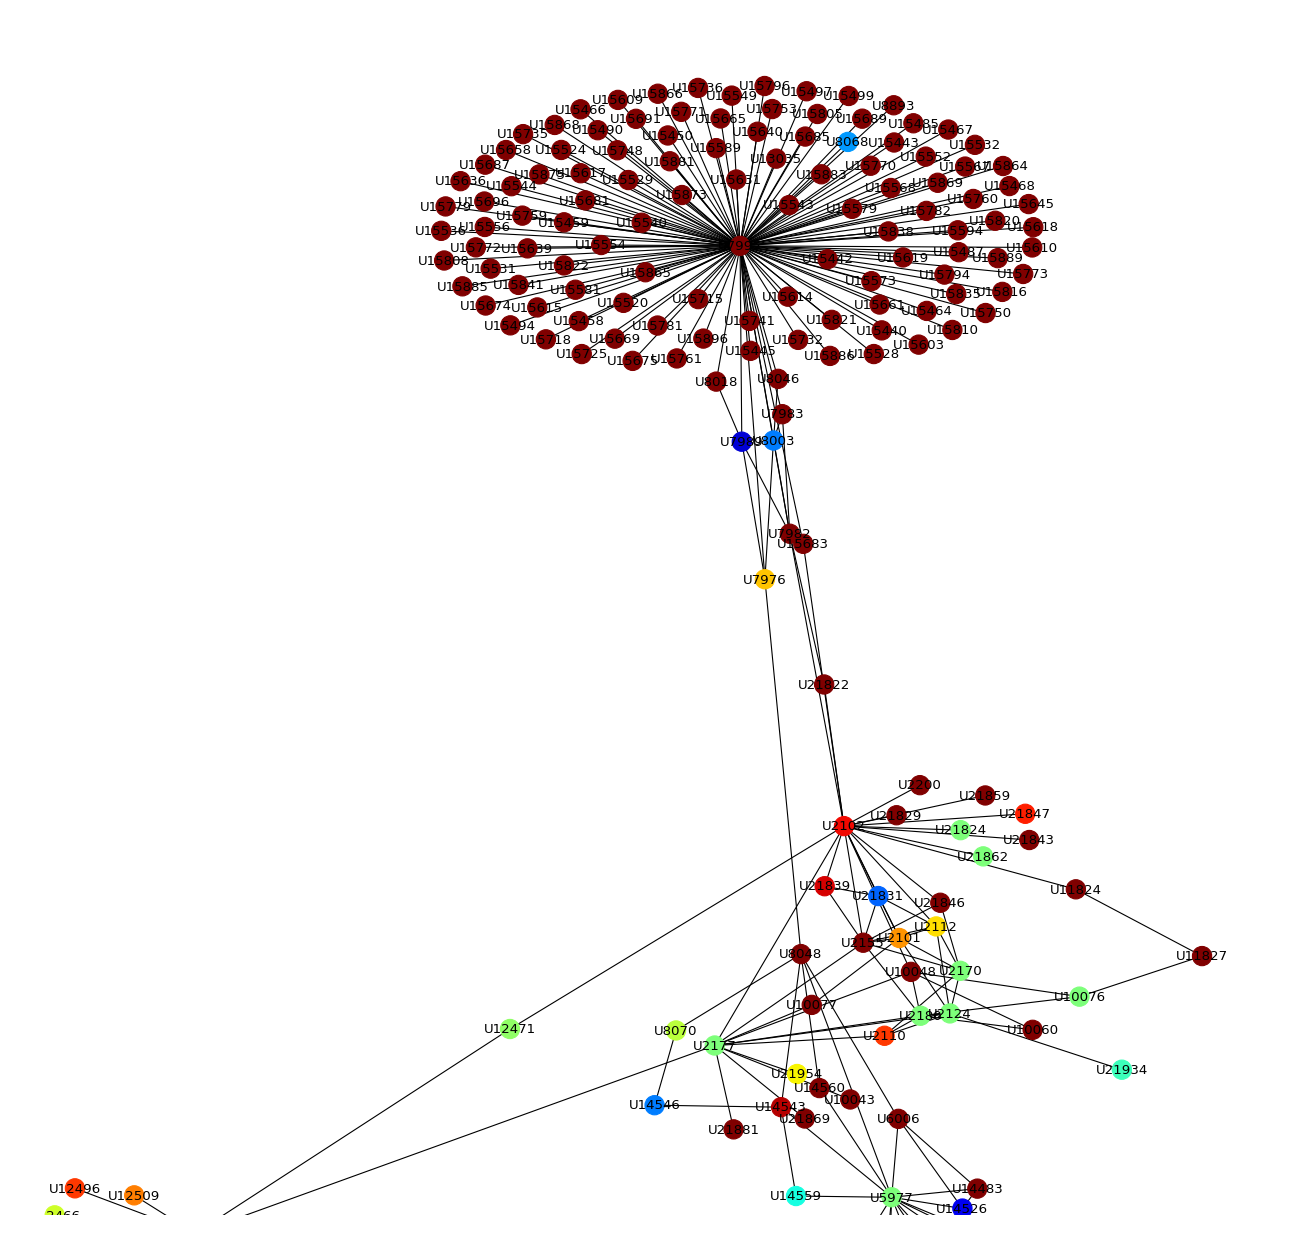

In [15]:
draw_graph(file_gexf, node_attribute=file_smallCollege, list_of_values_of_attributes=list_of_different_attribute_values(file_smallCollege))

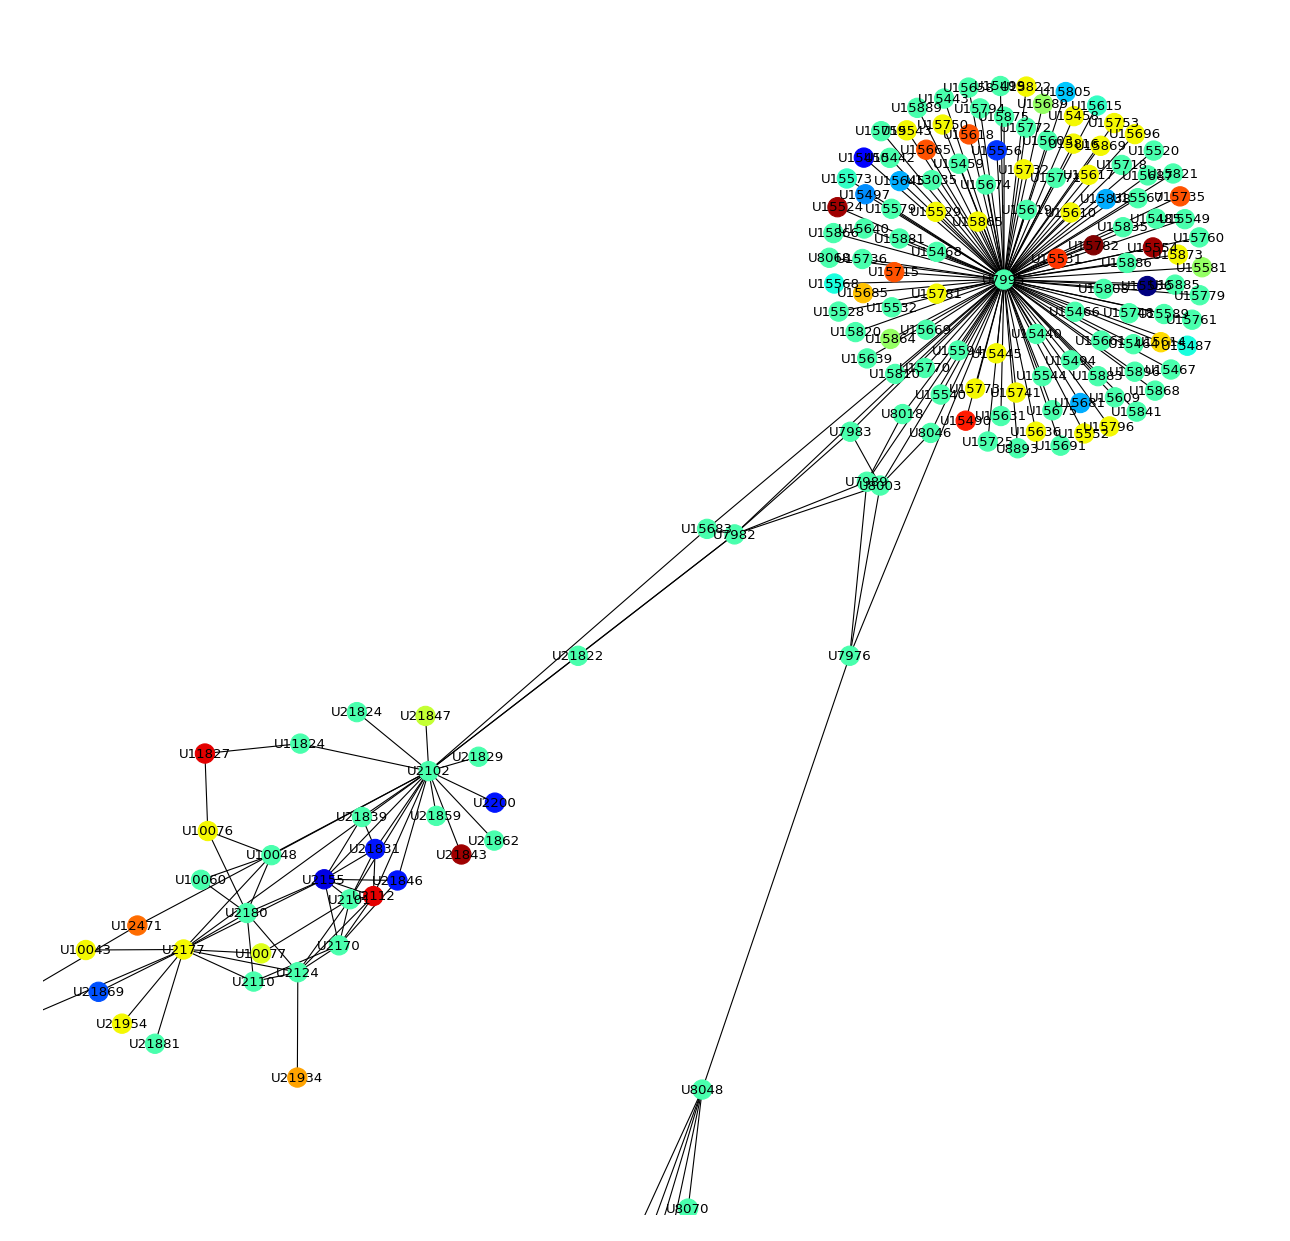

In [16]:
draw_graph(file_gexf, node_attribute=file_smallLocation, list_of_values_of_attributes=list_of_different_attribute_values(file_smallLocation))

In [17]:
import pprint as pp

In [18]:
def putLabelsToUnderstand(dict_obj, labels):
    for key, vals in dict_obj.items():
        new_dict = {}
        for sub in vals:
            if (labels[sub]) :
                new_dict[sub] = labels[sub]
            else :
                new_dict[sub] = 0
        dict_obj[key] = new_dict
    return dict_obj

In [19]:
pp.pprint(nx.shortest_path(file_gexf, source='U7982'))

{'U10043': ['U7982', 'U2102', 'U2177', 'U10043'],
 'U10048': ['U7982', 'U2102', 'U10048'],
 'U10060': ['U7982', 'U2102', 'U10048', 'U10060'],
 'U10076': ['U7982', 'U2102', 'U10048', 'U10076'],
 'U10077': ['U7982', 'U2102', 'U2177', 'U10077'],
 'U11824': ['U7982', 'U2102', 'U11824'],
 'U11827': ['U7982', 'U2102', 'U11824', 'U11827'],
 'U12465': ['U7982', 'U2102', 'U2177', 'U12465'],
 'U12466': ['U7982', 'U2102', 'U2177', 'U12465', 'U12466'],
 'U12471': ['U7982', 'U2102', 'U12471'],
 'U12472': ['U7982', 'U2102', 'U2177', 'U12465', 'U12472'],
 'U12474': ['U7982', 'U2102', 'U2177', 'U12465', 'U12474'],
 'U12475': ['U7982', 'U2102', 'U2177', 'U12465', 'U12475'],
 'U12482': ['U7982', 'U2102', 'U2177', 'U12465', 'U12482'],
 'U12486': ['U7982', 'U2102', 'U2177', 'U12465', 'U12486'],
 'U12489': ['U7982', 'U2102', 'U2177', 'U12465', 'U12489'],
 'U12490': ['U7982', 'U2102', 'U2177', 'U12465', 'U12490'],
 'U12496': ['U7982', 'U2102', 'U2177', 'U12465', 'U12496'],
 'U12503': ['U7982', 'U2102', 'U21

In [20]:
pp.pprint(putLabelsToUnderstand(nx.shortest_path(file_gexf, source='U7982'), file_smallLocation))

{'U10043': {'U10043': ['greater chicago area'],
            'U2102': ['urbana-champaign illinois area'],
            'U2177': ['greater chicago area'],
            'U7982': ['urbana-champaign illinois area']},
 'U10048': {'U10048': ['urbana-champaign illinois area'],
            'U2102': ['urbana-champaign illinois area'],
            'U7982': ['urbana-champaign illinois area']},
 'U10060': {'U10048': ['urbana-champaign illinois area'],
            'U10060': ['urbana-champaign illinois area'],
            'U2102': ['urbana-champaign illinois area'],
            'U7982': ['urbana-champaign illinois area']},
 'U10076': {'U10048': ['urbana-champaign illinois area'],
            'U10076': ['greater chicago area'],
            'U2102': ['urbana-champaign illinois area'],
            'U7982': ['urbana-champaign illinois area']},
 'U10077': {'U10077': ['raleigh-durham north carolina area'],
            'U2102': ['urbana-champaign illinois area'],
            'U2177': ['greater chicago area'],

 'U21831': {'U2102': ['urbana-champaign illinois area'],
            'U21831': ['san francisco bay area'],
            'U7982': ['urbana-champaign illinois area']},
 'U21839': {'U2102': ['urbana-champaign illinois area'],
            'U21839': ['urbana-champaign illinois area'],
            'U7982': ['urbana-champaign illinois area']},
 'U21843': {'U2102': ['urbana-champaign illinois area'],
            'U21843': ['terre haute indiana area'],
            'U7982': ['urbana-champaign illinois area']},
 'U21846': {'U2102': ['urbana-champaign illinois area'],
            'U21846': ['san francisco bay area'],
            'U7982': ['urbana-champaign illinois area']},
 'U21847': {'U2102': ['urbana-champaign illinois area'],
            'U21847': ['evansville indiana area'],
            'U7982': ['urbana-champaign illinois area']},
 'U21859': {'U2102': ['urbana-champaign illinois area'],
            'U21859': ['urbana-champaign illinois area'],
            'U7982': ['urbana-champaign illinois 

In [21]:
#def organizeLabels(g, locations, employers, college) :
def getTarget(target_string, target_file):
    matches = []
    for key, val in target_file.items() :
        if val.find('google') >= 0 : matches.append(key)
    return matches

In [41]:
me_id = 'U7982'
target_id = 'U15683'
precomputed_eccentricity = nx.eccentricity(file_gexf)
radius = nx.radius(file_gexf,precomputed_eccentricity)
short_paths = list(nx.all_simple_paths(file_gexf, source=me_id, target=target_id, cutoff=radius))

first = short_paths[0]
#print(list(nx.all_simple_paths(file_gexf, source='U7982', target='U15683', cutoff=radius)))
print(first)

['U7982', 'U7995', 'U15683']


In [42]:
main_dict = []

In [43]:
def labelizeArr(arr, labels, me, target, labels_type) :
    me_labels = labels[me] if me in labels else None
    target_labels = labels[target] if me in labels else None
    new_dict = {}
    total = 0
    length = 0
    for ele in arr:
        count = 0
        if ele in labels:
            values = labels[ele]
            for me_label in me_labels:
                if me_label in values : 
                    count += 1
                    total += 1
    length += 1
            
        new_dict[ele] = count 
    return { 'dict_results': new_dict, 'total': total, 'length': length }

print(labelizeArr(first, file_smallEmployer, me_id, target_id, 'employer'))
print(main_dict)

{'dict_results': {'U7982': 1, 'U7995': 0, 'U15683': 0}, 'total': 1}
[]


In [44]:
fist_ones = short_paths[:2]

In [46]:
def charaterize_arr(arr, labels, me, target, labels_type) :
    characterized_list = []
    for path in arr :
        results = labelizeArr(path, labels, me, target, labels_type)
        characterized_list.append(results)
    return characterized_list        

print(charaterize_arr(fist_ones, file_smallEmployer, me_id, target_id, 'employer'))

[{'dict_results': {'U7982': 1, 'U7995': 0, 'U15683': 0}, 'total': 1}, {'dict_results': {'U7982': 1, 'U21822': 0, 'U2102': 0, 'U15683': 0}, 'total': 1}]


In [57]:
print( charaterize_arr(fist_ones, file_smallLocation, me_id, target_id, 'location'))

[{'dict_results': {'U7982': 1, 'U7995': 1, 'U15683': 1}, 'total': 3}, {'dict_results': {'U7982': 1, 'U21822': 1, 'U2102': 1, 'U15683': 1}, 'total': 4}]


In [60]:
def sum_totals(list_of_lists) :
    big_arr = []
    number_of_lists = len(list_of_lists)
    if (number_of_lists == 0) : return
    for i in range(len(list_of_lists[0])) :
        total_sum = 0
        sub_dict = {}
        for j in range(number_of_lists) :
            total_sum += list_of_lists[j][i]['total']
            dict_results = list_of_lists[j][i]['dict_results']
            for key, val in dict_results.items():
                if not key in sub_dict : sub_dict[key] = 0
                sub_dict[key] += val
        big_arr.append({ 'total': total_sum, 'total_dict': sub_dict })
    
    return big_arr

arr1 = charaterize_arr(fist_ones, file_smallEmployer, me_id, target_id, 'employer')
arr2 = charaterize_arr(fist_ones, file_smallLocation, me_id, target_id, 'location')
print(sum_totals([arr1, arr2]))
    

[{'total': 4, 'total_dict': {'U7982': 2, 'U7995': 1, 'U15683': 1}}, {'total': 5, 'total_dict': {'U7982': 2, 'U21822': 1, 'U2102': 1, 'U15683': 1}}]


In [61]:
from operator import itemgetter, attrgetter

In [65]:
def best_total(sum_totals, quantity_best):
    sorted_sum = sorted(sum_totals, key=itemgetter('total'), reverse = True)
    return sorted_sum[:quantity_best]

sum_total = sum_totals([arr1, arr2])
print(best_total(sum_total, 1))

[{'total': 5, 'total_dict': {'U7982': 2, 'U21822': 1, 'U2102': 1, 'U15683': 1}}]


In [67]:
def isContinuous(sum_totals) :
    for ele in sum_totals:
        total = ele['total']
        total_dict = ele['total_dict']
        is_continuous = True
        for key_node, val in total_dict.items():
            if val == 0 : 
                is_continuous = False
                break
        ele['is_continuous'] = is_continuous

print(sum_total)

[{'total': 4, 'total_dict': {'U7982': 2, 'U7995': 1, 'U15683': 1}, 'is_continuous': True}, {'total': 5, 'total_dict': {'U7982': 2, 'U21822': 1, 'U2102': 1, 'U15683': 1}, 'is_continuous': True}]


In [72]:
def getBest(sum_totals, quantity_best) :
    sorted_sum = sorted(sum_totals, key=itemgetter('is_continuous', 'total'), reverse = True)
    #sorted_sum = sorted(sum_totals, key=itemgetter('is_continuous'))
    return sorted_sum#[:quantity_best]

sum_total[0]['is_continuous'] = False
print(getBest(sum_total, 2))

    

[{'total': 5, 'total_dict': {'U7982': 2, 'U21822': 1, 'U2102': 1, 'U15683': 1}, 'is_continuous': True}, {'total': 4, 'total_dict': {'U7982': 2, 'U7995': 1, 'U15683': 1}, 'is_continuous': False}]


IndentationError: unexpected indent (<ipython-input-27-9060a8b08791>, line 2)

In [28]:
print(file_smallLocation['U15683'])

['urbana-champaign illinois area']
